In [37]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [38]:
Consumer_Key = "vk9qCD9Ia25EvbwiRHrK8kn2f"
Consumer_Secret_Key = "aQV1MaIWMLhVmVFKAoY2lQTJnZ1Oc4idFimDeUDQ2OKyglTgI6"
Access_Token = "1236192381872947200-pLZGzNZgSAZJqvk7gcmgMnHCa2DhpZ"
Access_Token_Secret = "XJvtrFU9lVVx8L1arOHaw12wvSdQxQZOcVy1GTWFhJvny"

In [39]:
auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth)

In [40]:
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth)

In [41]:
posts = api.user_timeline(screen_name="github", count = 2000, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) Did you miss #GitHubUniverse? Don't worry, the whole event is available on demand now at https://t.co/9gQRFt3aqQ

2) RT @StackHawk: Join us in 24 hours for our webinar with @snyksec! Tomorrow at 9 am PT we will be showing you how to automate #AppSec testin…

3) Temporary interaction limits have new, powerful, and flexible updates. You can now enable interaction limits for up to six months. In addition, you can limit interactions across all your personal repositories with a single toggle. Read more at https://t.co/e0JYDtYxUt.

4) With the release of v6.1, @rails now supports rendering Ruby objects, a change @github introduced to the framework. Learn how we are using this feature with ViewComponent to bring encapsulation to our view layer as we scale to over 4.5k templates https://t.co/PdCG6anVGp

5) RT @PulumiCorp: Pulumi is now available in the @github Actions Marketplace! 
See how GitHub Actions and the new Pulumi CI/CD Assistant help…



In [42]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,"Did you miss #GitHubUniverse? Don't worry, the..."
1,RT @StackHawk: Join us in 24 hours for our web...
2,"Temporary interaction limits have new, powerfu..."
3,"With the release of v6.1, @rails now supports ..."
4,RT @PulumiCorp: Pulumi is now available in the...


In [43]:
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,"Did you miss GitHubUniverse? Don't worry, the ..."
1,: Join us in 24 hours for our webinar with ! T...
2,"Temporary interaction limits have new, powerfu..."
3,"With the release of v6.1, now supports render..."
4,: Pulumi is now available in the Actions Mark...
...,...
195,Acompáñanos mañana en nuestro meetup virtual e...
196,"This year GitHubUniverse has gone virtual, and..."
197,Did you know you can have GitHub in your pocke...
198,"At GitHub, documentation _is_ code, and now, d..."


In [44]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)


# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,"Did you miss GitHubUniverse? Don't worry, the ...",0.400000,0.300000
1,: Join us in 24 hours for our webinar with ! T...,0.000000,0.000000
2,"Temporary interaction limits have new, powerfu...",0.493766,0.172987
3,"With the release of v6.1, now supports render...",0.000000,0.000000
4,: Pulumi is now available in the Actions Mark...,0.427273,0.318182
...,...,...,...
195,Acompáñanos mañana en nuestro meetup virtual e...,0.000000,0.000000
196,"This year GitHubUniverse has gone virtual, and...",0.567857,0.142857
197,Did you know you can have GitHub in your pocke...,0.000000,0.000000
198,"At GitHub, documentation _is_ code, and now, d...",0.500000,0.138889


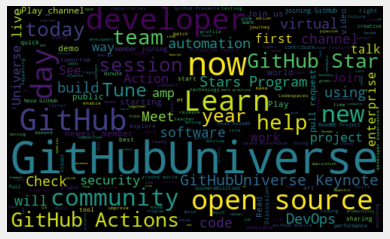

In [45]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [46]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):

    
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,"Did you miss GitHubUniverse? Don't worry, the ...",0.400000,0.300000,Positive
1,: Join us in 24 hours for our webinar with ! T...,0.000000,0.000000,Neutral
2,"Temporary interaction limits have new, powerfu...",0.493766,0.172987,Positive
3,"With the release of v6.1, now supports render...",0.000000,0.000000,Neutral
4,: Pulumi is now available in the Actions Mark...,0.427273,0.318182,Positive
...,...,...,...,...
195,Acompáñanos mañana en nuestro meetup virtual e...,0.000000,0.000000,Neutral
196,"This year GitHubUniverse has gone virtual, and...",0.567857,0.142857,Positive
197,Did you know you can have GitHub in your pocke...,0.000000,0.000000,Neutral
198,"At GitHub, documentation _is_ code, and now, d...",0.500000,0.138889,Positive


In [47]:
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1) In 2020, we’ve had to rethink how to collaborate and build software in the world’s largest trial of remote work. Dr. Nicole Forsgren is sharing insights on the findings from her past work and the 2020 State of the Octoverse report at GitHubUniverse  

2) For the past few months,  has been working to open source some of their applications. If you're interested in collaborating find out how at  GitHubUniverse PublicHealth ICT4D

3) Now's the time to explore the past, present, and future of technology and public health with WHO. It's all happening on the Developer channel in just a few minutes at GitHubUniverse. Tune in!  

4) GitHub Enterprise is built on the same principles as  and as a result benefits from the years we've spent optimizing the platform to be trusted, reliable, and resilient." GitHubUniverse  

5) Only 17% of vulnerabilities come from malicious behavior, but what about the other 83%? GitHubUniverse  

6) One artist in Paris, the other in Mex

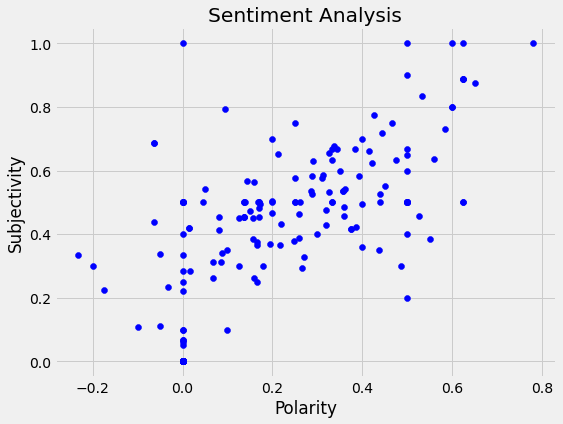

In [48]:
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [49]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

64.5

In [50]:
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

5.0

In [51]:
# Show the value counts
df['Analysis'].value_counts()

Positive    129
Neutral      61
Negative     10
Name: Analysis, dtype: int64

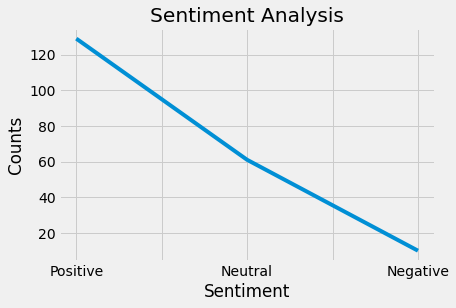

In [52]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'line')
plt.show()

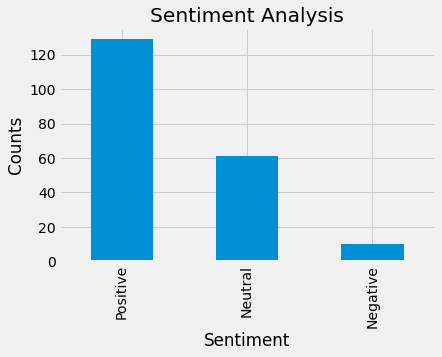

In [53]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()